In [33]:
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [34]:
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [35]:
df = pd.read_excel("../data/patient2019.xlsx")
df.head()

,검역일시,검역소,국적,성별,승객승무원구분,검사결과
0,2019-01-01 04:21,국립인천공항검역소,한국,여,승객,양성
1,2019-01-01 04:21,국립인천공항검역소,한국,여,승객,양성
2,2019-01-01 06:10,국립김해검역소,한국,남,승객,양성
3,2019-01-01 06:25,국립인천공항검역소,한국,여,승객,양성
4,2019-01-01 06:25,국립인천공항검역소,한국,남,승객,양성


In [60]:
count = df['검역일시'].groupby([df['성별'],df['검사결과']]).count()
count

성별  검사결과
남   양성      559
    음성      407
여   양성      502
    음성      401
Name: 검역일시, dtype: int64

In [56]:
df2=df.loc[:,['성별','검사결과','국적']]
df3=df2.groupby(by=['성별','검사결과']).count()
df4=df3.reset_index()
df4.columns=['성별', '검사결과','유무']
ind=['남','여']
df4

,성별,검사결과,유무
0,남,양성,559
1,남,음성,407
2,여,양성,502
3,여,음성,401


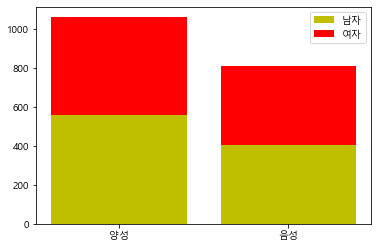

[559, 407]
[502, 401]
  성별 검사결과   유무
0  남   양성  559
1  남   음성  407
2  여   양성  502
3  여   음성  401


In [59]:
men=df4.iloc[:2,2]
women=df4.iloc[2:,2]
ind=['양성','음성']
plt.bar(ind, men, color='y')
plt.bar(ind, women, bottom=men, color='r')
plt.legend(labels=['남자','여자'])
plt.show()

print(list(men))
print(list(women))
print(df4)